# Utility

In [1]:
from acados_tool.plotFcn import *
import numpy as np

def plot_traj(traj_actual, time_actual, opt):
    if (opt==1):
        plotTrackProj(traj_actual[:], opt=opt, vel=True, whole=True)
    elif (opt==2):
        plotTrackProj(traj_actual[:-3], opt=opt, vel=True, whole=True)
        
    if (opt==1):
        map_name = 'LMS_Track.txt'
    elif (opt==2):
        map_name = 'bigger_track.txt'

    step = 0
    for i in range(0, time_actual.shape[0]):
        step += (int)(time_actual[i][1])
        x,y,_,_ = transformProj2Orig(traj_actual[step][0],traj_actual[step][1],0,0,map_name)
        plt.plot(x,y,"go",markersize=12, alpha=.5)
        
def calc_info(traj_actual, time_actual):
    plt.figure()

    prog_t = []
    calc_t = []
    diff_t = []
    progress = []
    iter_num = []
    step = 0
    for i in range(0, time_actual.shape[0]-1):
        step += time_actual[i][1]
        progress += [traj_actual[(int)(step)][0]]

        prog_t += [time_actual[i][2]]
        calc_t += [time_actual[i][0]]
        diff_t += [time_actual[i][2]-time_actual[i][0]]
        iter_num += [time_actual[i][3]]


    plt.plot(prog_t[1:], 'gx')
    plt.plot(calc_t[1:], 'bx')
    plt.show()

    plt.plot(prog_t[1:], 'gx-', label='progress time')
    plt.plot(calc_t[1:], 'bx-', label='NMPC recalculation time')
    plt.xlabel('The release point of the NMPC recalculation result')
    plt.ylabel('Time [ms]')
    plt.legend()
    plt.show()

    plt.plot(diff_t[1:], 'bx')
    plt.plot([0,8],[0,0], 'r')
    plt.show()

    n, bins, patches = plt.hist(diff_t[1:], 5, facecolor='blue', alpha=0.5, rwidth=0.9)
    plt.xlabel('Progress time minus Calculation time at each step [ms]')
    plt.ylabel('Count')
    plt.title('Histogram')
    plt.show()

    print("prog_t max: ", max(prog_t[1:]), " - min: ", min(prog_t[1:]), " - avg: ", np.mean(prog_t[1:]))
    print("calc_t max: ", max(calc_t[1:]), " - min: ", min(calc_t[1:]), " - avg: ", np.mean(calc_t[1:]))
    print("iter_num max: ", max(iter_num[1:]), " - min: ", min(iter_num[1:]), " - avg: ", np.mean(iter_num[1:]))
    
    return prog_t, calc_t, diff_t, iter_num

# Track 1

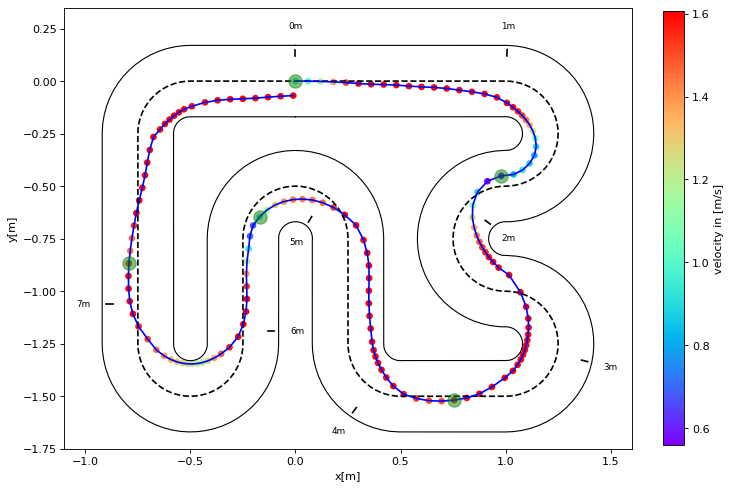

In [2]:
traj_actual = np.loadtxt("../result/triggering-until_N/track1/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
time_actual = np.loadtxt("../result/triggering-until_N/track1/N30/traj_time.txt", usecols=range(0,), dtype=np.float32)
plot_traj(traj_actual, time_actual, 1)

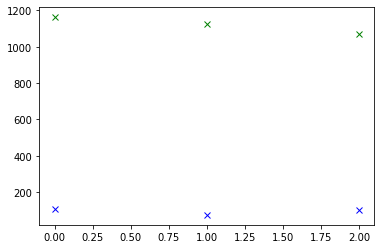

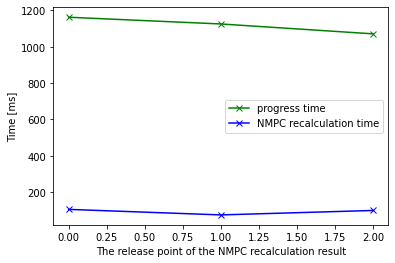

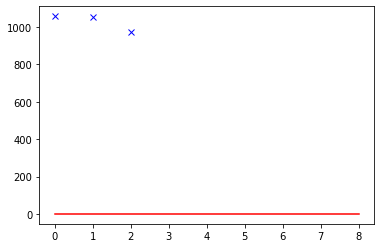

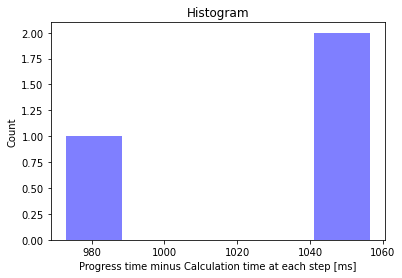

prog_t max:  1161.8479  - min:  1070.5088  - avg:  1119.0577
calc_t max:  104.441  - min:  73.983  - avg:  92.30667
iter_num max:  20.0  - min:  13.0  - avg:  17.666666


In [3]:
prog_t, calc_t, diff_t, iter_num = calc_info(traj_actual, time_actual)

## reach iter max

In [4]:
[print("step: ", i, ", iter num: ", e, ", KKT: ", time_actual[i][-1]) for i, e in enumerate(iter_num) if e > 15]
print("TOTAL recal num: ", time_actual.shape[0]-1)
print("TOTAL computation time: ", sum(time_actual[:,0])-time_actual[0,0])
print("TOTAL avg comp time: ", (sum(time_actual[:,0])-time_actual[0,0])/(time_actual.shape[0]-1))
print("lap time: ", traj_actual[-1])

step:  0 , iter num:  20.0 , KKT:  7.5e-05
step:  1 , iter num:  20.0 , KKT:  0.031877
step:  3 , iter num:  20.0 , KKT:  0.026508
TOTAL recal num:  4
TOTAL computation time:  340.8470039367676
TOTAL avg comp time:  85.2117509841919
lap time:  [ 8.7      -0.069026  0.024132  1.600001  0.161643  0.124752  5.331194]


# Track 2

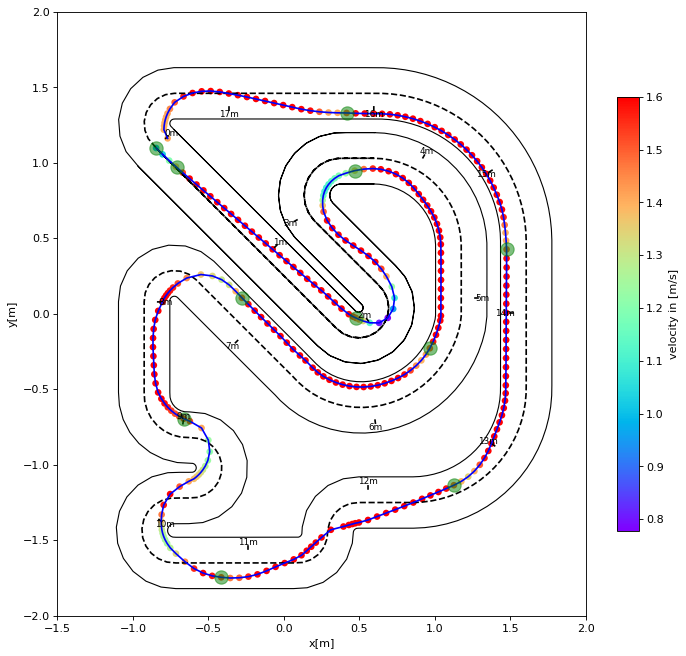

In [5]:
traj_actual = np.loadtxt("../result/triggering-until_N/track2/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
time_actual = np.loadtxt("../result/triggering-until_N/track2/N30/traj_time.txt", usecols=range(0,), dtype=np.float32)
plot_traj(traj_actual, time_actual, 2)

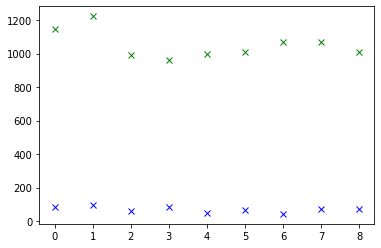

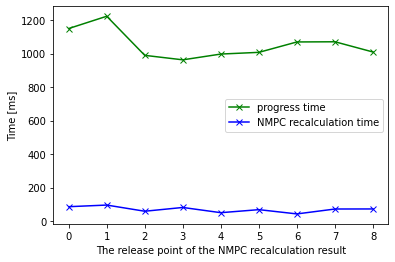

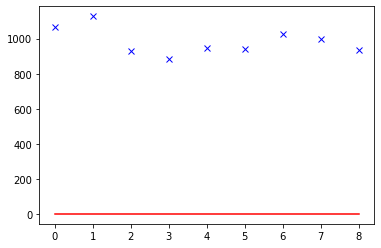

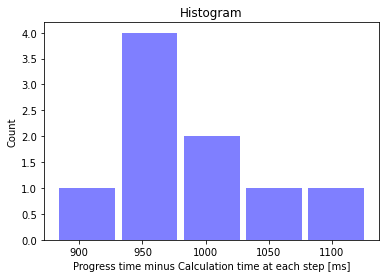

prog_t max:  1222.9938  - min:  962.6515  - avg:  1053.1426
calc_t max:  95.183  - min:  42.288  - avg:  69.218895
iter_num max:  14.0  - min:  9.0  - avg:  11.888889


In [6]:
prog_t, calc_t, diff_t, iter_num = calc_info(traj_actual, time_actual)

In [7]:
[print("step: ", i, ", iter num: ", e, ", KKT: ", time_actual[i][-1]) for i, e in enumerate(iter_num) if e > 15]
print("TOTAL recal num: ", time_actual.shape[0]-1)
print("TOTAL computation time: ", sum(time_actual[:,0])-time_actual[0,0])
print("TOTAL avg comp time: ", (sum(time_actual[:,0])-time_actual[0,0])/(time_actual.shape[0]-1))
print("lap time: ", traj_actual[-1])

TOTAL recal num:  10
TOTAL computation time:  692.6959991455078
TOTAL avg comp time:  69.26959991455078
lap time:  [ 1.8000000e+01  8.5819997e-03 -1.0000000e-01  1.5142030e+00
  6.3632500e-01 -1.7627400e-01  1.0532535e+01]
